# Import Dataset from Github directly

In [1]:
import requests
import pandas as pd

url = "https://github.com/yashbhutoria/PCE-CS-III-ML-Club"
html = requests.get(url).content
df_list = pd.read_html(html)
df1 = df_list[1]
df2 = df_list[2]
#df1

# Import Second Dataset of 2nd Year Students

In [2]:
#df2

# Concatenate Both Data into Single dataset

In [3]:
frames = [df2, df1]
result = pd.concat(frames)
#result

# Extract Stars and Name Column

In [4]:
X=result[['Stars ⭐️','Name']]
#X

# Extract Students having atleast one star

In [5]:
y =X[X['Stars ⭐️']>=1]
#y

# Sort according to no. of stars in ascending order

In [6]:
y=y.sort_values('Stars ⭐️', ascending=True)
#y

# Rename Columns

In [7]:
y.columns = ['Stars','Name']

# Calculate No. of members

In [8]:
members=X['Name'].count()
nm="Members",members
#nm

# Calculate total no. of stars

In [9]:
no=y['Stars'].sum()
x="Total Number of Stars",no
#x

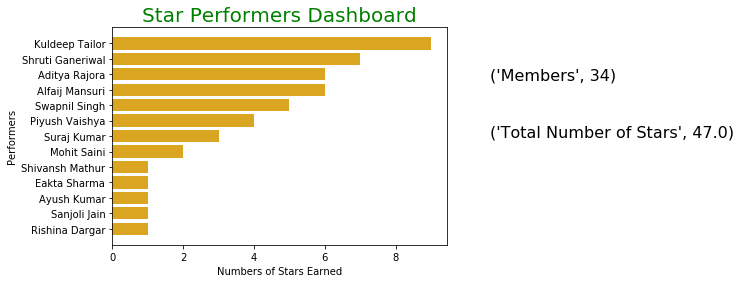

In [12]:
import matplotlib.pyplot as plt
n= range(len(y['Name'])) 
fig, ax = plt.subplots()
ax.barh(n,y['Stars'], align="center", color='goldenrod')
ax.set_yticks(n)
ax.set_yticklabels(y['Name']) 
plt.title("Star Performers Dashboard" ,color='green',fontsize=20)
plt.xlabel("Numbers of Stars Earned")
plt.ylabel("Performers")
plt.figtext(1, 0.5, x, fontsize=16)
plt.figtext(1, 0.7, nm, fontsize=16)
plt.show()

# Import assignment dataset from link

In [13]:
url2 = "https://docs.google.com/spreadsheets/d/12ctiyShx00Chea0AZ0C9Z1wrKFSunZWUKT6gZmnHdaw/edit#gid=1027535130"
html2 = requests.get(url2).content
df_list2 = pd.read_html(html2)
df3=df_list2[0]
#df3

# Extracting required columns

In [14]:
z=df3.iloc[2:,3:5]
z.columns = ['RegistrationNo', 'AssignmentNo']
z=z.assign(RegistrationNo=z['RegistrationNo'].str.upper())
z=pd.DataFrame(z)
#z

# Group identical Reg.No and Calculate its occurence

In [15]:
z2=pd.DataFrame({'AssignmentNo' : z.groupby('RegistrationNo').size()}).reset_index()
#z2

# Sort according to descending order

In [16]:
data=z2.sort_values('AssignmentNo', ascending=False)
#data

# Fetching data from repo table for name matching with registration number

In [17]:
filter_data =result[['Registration No.', 'Name']]
#filter_data

In [18]:
filter_data.columns = ['RegistrationNo', 'Name']

# Merging both repo table data and extracted assignment data

In [19]:
Merged_data=pd.merge(z2, filter_data,on="RegistrationNo")
#Merged_data

# Result:-

In [21]:
final_list =Merged_data[['Name', 'AssignmentNo']]
final_list.columns=['Name','Assignment_Completed']
final_list=final_list.style.background_gradient(cmap='viridis', low=.5, high=0)
final_list


,Name,Assignment_Completed
0,Aditya Rajora,1
1,Ayush Kumar,3
2,Chahat Jain,2
3,Diksha Bothra,2
4,Disti Jain,4
5,Eakta Sharma,6
6,Jaya Sharma,6
7,Manas,1
8,Megha Gupta,5
9,Mohit Saini,5


In [22]:
reg_1 =result[['Registration No.']]
reg_1.columns=['Reg']
reg_2 =z[['RegistrationNo']]
reg_2.columns=['Reg']
reg_2=reg_2.drop_duplicates(['Reg'], keep='last')
zero=pd.concat([reg_1, reg_2])
zero=zero.assign(Reg=zero['Reg'].str.upper())
zero=zero.drop_duplicates(keep=False)

In [24]:
reg_name_1=result[['Registration No.', 'Name']]
reg_name_1.columns = ['Reg', 'Name']
reg_name_1=reg_name_1.assign(Reg=reg_name_1['Reg'].str.upper())
zero_sub=pd.merge(zero,reg_name_1, on="Reg")
zero_sub=zero_sub[['Name']]
zero_sub.columns=['Students with 0 Submissioin in Form']
zero_sub=zero_sub.style.set_properties(**{'background-color': 'black',
                           'color': 'red',
                           'border-color': 'white'})
zero_sub

,Students with 0 Submissioin in Form
0,Chayan Jain
1,pranjal shah
2,Reena Badesra
3,Rajendra Singh Devara
4,Mohit Agarwal
